<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Julian Andres Quimbayo Castro  <br>
Fecha: 26/12/2022

## Importación de librerias necesarias

In [259]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías scikit-learn
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
##pip install scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

## Cargar el Dataset

In [260]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'

datos = pd.read_csv(url, sep=';')

datos.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

El dataset es acerca de datos correspondientes a evaluación de aspectos de carros con respecto a su nivel de seguridad, las instancias son 1750 en total. Como variables de entrada existen Buying, manintenance, Doors, person, lug_boot, class y la variable objetivo es safety para este caso en particular. Safety posee 3 valores para las instancias las cuales son: Low(bajo), med(Medio) y High(Alto).

Variables de entrada:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
Class: unacc, acc, good, vgood
lug_boot: small, med, big.

Variable Objetivo:
safety: low, med, high.

El problema es determinar ¿cuál es la clase con mejor probabilidad de clasificación para las tres clases usando arboles de decisión y random forest? con esto se podría clasificar la seguridad de autos nuevos con base en los diferentes algoritmos.

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [261]:
#Código que responde a la descripción anterior - Funciones particulares
# Función informe sobre los datos NAN e información general
def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

##Función para Número de instancias por clase
def instClase(df):
      for i in df.columns:
            print(df[i].value_counts())

##Función para diagrama de caja
def diagCaja(df, coluno, coldos):
      sns.boxplot(x =coluno,
             y =coldos,
             data = df).set_title("Diagrama de Caja")

##Función para diagrama de barras
def diagBarra(df, coluno, coldos):
      sns.countplot(data=df, x=coluno, hue=coldos)

##Función para partición de variables entrada y objetivo
def particion(df, col):
      X = df.drop([col], axis=1)
      y = df[col]
      return X, y

##Función para one hot encoding
def oneHot(df):
      return pd.get_dummies(df)


In [262]:
datos_NA(datos)
##Se evidencian tres clases de la variable objetivo safety, las cuales determinan el nivel de seguridad del auto según la evaluación
##low (Bajo), Med(Medio), High(Alto)
##1750 instancias en total por 7 columnas, todas las variables son de tipo Object por tal motivo se debe proceder a un encoding para
##trabajar el algoritmo de mejor manera.


Dimensiones : 1750 filas, 7 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                Buying     object            4          0
                           Maintenance     object            4          0
                                 Doors     object            4          0
                                Person     object            3          0
                              lug_boot     object            3          0
                                safety     object            3          0
                                 class     object            4          0


In [263]:
##Cantidad de instancias por clase
instClase(datos)
##Para la clase de compra en cuanto al precio(Buying) la distribución es relativamente equitativa entre vhigh(443), med(438), low(437) 
# y high(432); de igual forma mantenimiento (maintenance) posee la mismas categorías vhigh(437), med(434), low(447) y high(432). Para el
#número de puertas(Doors) las categorías son:2(444), 5more(437), 3(435) y 4(434), para cantidad de personas u ocupación del auto(Person)
#la distribución es, 2(578), 4(587) y more(585). En cuanto a capacidad del maletero(lug_boot) la distribución es big(585), med(583), small(582).
#En cuanto a seguridad(safety) su distribución es, high(590), med(582), low(578), cuenta con un buen balance para el algoritmo de clasificación.
#Finalmente, la variable class posee 4 categorias las cuales son, unacc(1215), acc(390), good(75) y vgood(70).

##Todos los valores son conocidos, no existen datos NAN aleatorios, ni tipográficos.

vhigh    443
med      438
low      437
high     432
Name: Buying, dtype: int64
low      447
vhigh    437
med      434
high     432
Name: Maintenance, dtype: int64
2        444
5more    437
3        435
4        434
Name: Doors, dtype: int64
4       587
more    585
2       578
Name: Person, dtype: int64
big      585
med      583
small    582
Name: lug_boot, dtype: int64
high    590
med     582
low     578
Name: safety, dtype: int64
unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64


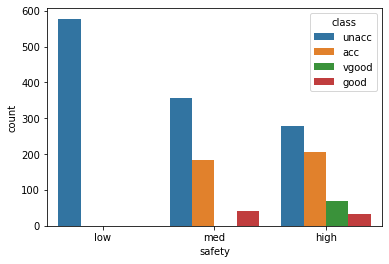

In [264]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)
#Visualización de la información
diagBarra(datos, 'safety','class')
#La mayor cantidad de autos categorizados como no accesibles llega casi a las 600 observaciones y se categoriza como seguridad baja.
#a medida que aumenta el nivel de seguridad asi mismo disminuye la relación de no accesible. la distribución de autos muy bueno o buenos
#en cuanto a seguridad es demasiado bajo. Se debe observar al final de realizar el algoritmo si es mas considerable balancear el dataset 
#o si es suficiente con la variable objetivo safety que presenta buena distribución.

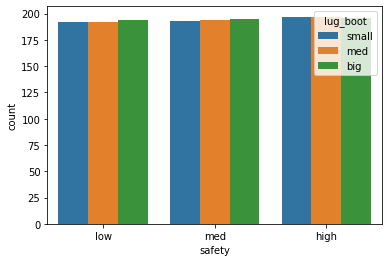

In [265]:
##En cuanto a distribución de la variable safety vs el tamaño del maletero se presenta uniformidad, es determinante la variable class,
##no tanto las demas para construir las reglas del arbol para tener atención en la creación del modelo.
diagBarra(datos, 'safety','lug_boot')

En un par de párrafos haga un resumen de los principales hallazagos encontrados: se evidencia una relación clave entre safety y class, normalmente el criterio de variable objetivo debería ser class con sus niveles unacc, acc, vgood y good pero para este caso en particular se desea clasificar por medio del nivel de safety low,med y high. Se debe revisar como afecta el balanceo del dataset de manera positiva o negativa la clasificación y en caso de ser necesario nivelar la data. En cuanto a las demas variables presentan una distribución uniforme y se debe utilizar un enconding con el fin de mejorar el performance se sugiere variables dummies y/o one hot encoding.   

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [266]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
#Partición de los datos en variables de entrada y variable objetivo
X, y = particion(datos, 'safety')
X.head, y.head

(<bound method NDFrame.head of      Buying Maintenance  Doors Person lug_boot  class
 0     vhigh       vhigh      2      2    small  unacc
 1     vhigh       vhigh      2      2    small  unacc
 2     vhigh       vhigh      2      2    small  unacc
 3     vhigh       vhigh      2      2      med  unacc
 4     vhigh       vhigh      2      2      med  unacc
 ...     ...         ...    ...    ...      ...    ...
 1745    low         low  5more   more      med  vgood
 1746    low         low  5more   more      med  vgood
 1747    low         low  5more   more      big  unacc
 1748    low         low  5more   more      big   good
 1749    low         low  5more   more      big  vgood
 
 [1750 rows x 6 columns]>,
 <bound method NDFrame.head of 0        low
 1        med
 2       high
 3        low
 4        med
         ... 
 1745    high
 1746    high
 1747     low
 1748     med
 1749    high
 Name: safety, Length: 1750, dtype: object>)

In [267]:
##One hot encoding a variables de Entrada X
X = oneHot(X)
X.head()

,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh,Doors_2,Doors_3,...,Person_2,Person_4,Person_more,lug_boot_big,lug_boot_med,lug_boot_small,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


## División del dataset en datos de entrenamiento y datos de test 

In [268]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.
#se realiza una partición inicial de 90% datos de entrenamiento y 10% de datos de testeo y un random state de 100.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 100)

## Ajuste de los modelos de clasificación propuestos

Justifique la selección de las dos propuestas de modelación seleccionadas:

In [269]:
#Código de ajuste del modelo de clasificación 1 - Parámetro Gini
algoGini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
algoGini.fit(X_train, y_train)
ypredgini = algoGini.predict(X_test)
print("Valor de eficiencia: {:.3f}".format(round(accuracy_score(y_test, ypredgini),2)))

Valor de eficiencia: 0.560


In [270]:
##Revisión de overfitting y underfitting
algoGini.score(X_train, y_train)

0.5276190476190477

In [271]:
algoGini.score(X_test, y_test)
#el valor de overfitting y underfitting es relativamente bajo sobre el 0.04 lo cual es aceptable.

0.56

In [272]:
##Variables importantes
variables = pd.DataFrame(index=X.columns,data=algoGini.feature_importances_,columns=['Caracteristicas importantes'])
variables[variables['Caracteristicas importantes']>=0.1]

,Caracteristicas importantes
Person_2,0.146940
class_unacc,0.594120
class_vgood,0.124438


[Text(0.4583333333333333, 0.875, 'class_unacc <= 0.5\ngini = 0.667\nsamples = 1575\nvalue = [527, 518, 530]'),
 Text(0.25, 0.625, 'class_vgood <= 0.5\ngini = 0.488\nsamples = 476\nvalue = [275, 0, 201]'),
 Text(0.16666666666666666, 0.375, 'lug_boot_small <= 0.5\ngini = 0.5\nsamples = 415\nvalue = [214, 0, 201]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.493\nsamples = 300\nvalue = [132, 0, 168]'),
 Text(0.25, 0.125, 'gini = 0.409\nsamples = 115\nvalue = [82, 0, 33]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 61\nvalue = [61, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'Person_2 <= 0.5\ngini = 0.636\nsamples = 1099\nvalue = [252, 518, 329]'),
 Text(0.5, 0.375, 'Maintenance_vhigh <= 0.5\ngini = 0.554\nsamples = 565\nvalue = [77, 337, 151]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.465\nsamples = 371\nvalue = [30, 256, 85]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.651\nsamples = 194\nvalue = [47, 81, 66]'),
 Text(0.8333333333333334, 0.375, 'lug_boot_med <= 0.5\ngini

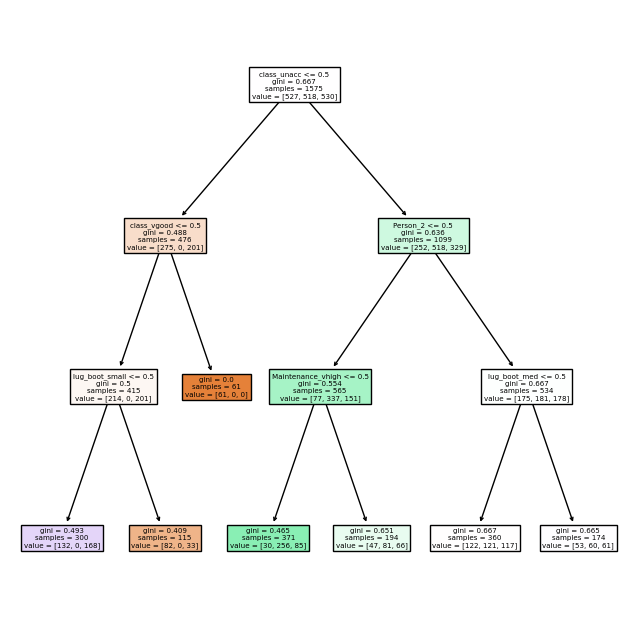

In [273]:
plt.figure(figsize=(8,8),dpi=100)
plot_tree(algoGini,filled=True,feature_names=X.columns)

/home/julian/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


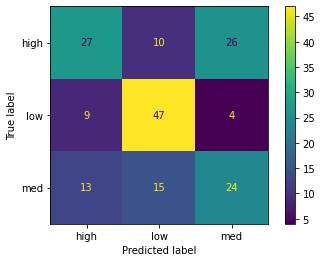

In [274]:
plot_confusion_matrix(algoGini, X_test, y_test)

In [275]:
##Matriz de clasificación - Gini
print(classification_report(y_test, ypredgini))

              precision    recall  f1-score   support

        high       0.55      0.43      0.48        63
         low       0.65      0.78      0.71        60
         med       0.44      0.46      0.45        52

    accuracy                           0.56       175
   macro avg       0.55      0.56      0.55       175
weighted avg       0.55      0.56      0.55       175



In [276]:
#Código de ajuste del modelo de clasificación 2 - Parámetro Entropy

algoEntropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
algoEntropy.fit(X_train, y_train)
ypredEntropy = algoEntropy.predict(X_test)
print("Valor de eficiencia: {:.3f}".format(round(accuracy_score(y_test, ypredgini),2)))

Valor de eficiencia: 0.560


In [277]:
##Revisión de overfitting y underfitting
algoEntropy.score(X_train, y_train)

0.5276190476190477

In [278]:
algoEntropy.score(X_test, y_test)
#el valor de overfitting y underfitting es relativamente bajo sobre el 0.04 lo cual es aceptable.

0.56

In [279]:
##Variables importantes
variables = pd.DataFrame(index=X.columns,data=algoEntropy.feature_importances_,columns=['Caracteristicas importantes'])
variables[variables['Caracteristicas importantes']>=0.1]

,Caracteristicas importantes
Person_2,0.120805
class_unacc,0.680792
class_vgood,0.100565


[Text(0.4583333333333333, 0.875, 'class_unacc <= 0.5\nentropy = 1.585\nsamples = 1575\nvalue = [527, 518, 530]'),
 Text(0.25, 0.625, 'class_vgood <= 0.5\nentropy = 0.982\nsamples = 476\nvalue = [275, 0, 201]'),
 Text(0.16666666666666666, 0.375, 'lug_boot_small <= 0.5\nentropy = 0.999\nsamples = 415\nvalue = [214, 0, 201]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.99\nsamples = 300\nvalue = [132, 0, 168]'),
 Text(0.25, 0.125, 'entropy = 0.865\nsamples = 115\nvalue = [82, 0, 33]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 61\nvalue = [61, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'Person_2 <= 0.5\nentropy = 1.52\nsamples = 1099\nvalue = [252, 518, 329]'),
 Text(0.5, 0.375, 'Maintenance_vhigh <= 0.5\nentropy = 1.345\nsamples = 565\nvalue = [77, 337, 151]'),
 Text(0.4166666666666667, 0.125, 'entropy = 1.15\nsamples = 371\nvalue = [30, 256, 85]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.551\nsamples = 194\nvalue = [47, 81, 66]'),
 Text(0.8333333333333334, 0.37

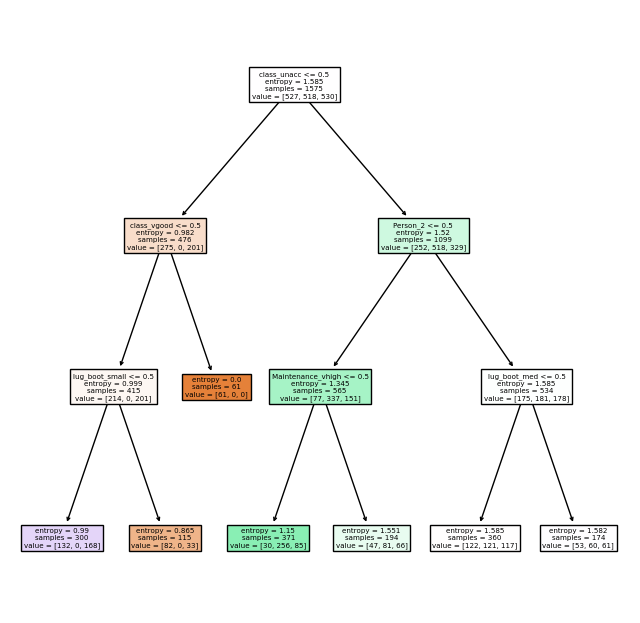

In [280]:
plt.figure(figsize=(8,8),dpi=100)
plot_tree(algoEntropy,filled=True,feature_names=X.columns)

/home/julian/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


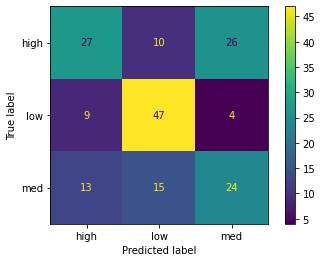

In [281]:
plot_confusion_matrix(algoEntropy, X_test, y_test)

In [282]:
##Matriz de clasificación - ENtropy
print(classification_report(y_test, ypredEntropy))

              precision    recall  f1-score   support

        high       0.55      0.43      0.48        63
         low       0.65      0.78      0.71        60
         med       0.44      0.46      0.45        52

    accuracy                           0.56       175
   macro avg       0.55      0.56      0.55       175
weighted avg       0.55      0.56      0.55       175



In [283]:
##Modelo random forest Clasificación 3
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

GridRF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
GridRF.fit(X_train, y_train)

GridRF.best_params_



{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [284]:
RFMODEL=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=4, criterion='entropy')

RFMODEL.fit(X_train, y_train)

y_pred_RF=RFMODEL.predict(X_test)

## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión


In [285]:
#Código para mostrar la evaluación del modelo de clasificación 1
##Matriz de clasificación - Gini
print(classification_report(y_test, ypredgini))
##Instancias clasificadas correctamente tenemos el recall para la clase high con 0.43, low con 0.78 y med con 0.46, lo cual quiere decir
##que el modelo es muy bueno para clasificar cuando la clase es low.

              precision    recall  f1-score   support

        high       0.55      0.43      0.48        63
         low       0.65      0.78      0.71        60
         med       0.44      0.46      0.45        52

    accuracy                           0.56       175
   macro avg       0.55      0.56      0.55       175
weighted avg       0.55      0.56      0.55       175



In [286]:
from sklearn.metrics import confusion_matrix

#High
TPH = 27
FNH = 10+26
FPH = 9+13
TNH = 47+4+15+24
print("\033[1m-----------------------------\033[0m")
print('Instancias correctas para la clase High: {} de {}'.format(TPH+TNH, y_test.shape))
print('Instancias incorrectas para la clase High: {} de {}'.format(FNH+FPH, y_test.shape))
print('TP Rate para High: {}'.format(round(TPH/(TPH+FNH),2)))
print('TN Rate para High: {}'.format(round(TNH/(TNH+FPH),2)))
print('Precision para High: {}'.format(round(TPH/(TPH+FPH),2)))
print("\033[1m-----------------------------\033[0m")
#Low
TPL = 47
FNL = 9+4
FPL = 10+15
TNL = 27+26+13+24
print("\033[1m-----------------------------\033[0m")
print('Instancias correctas para la clase Low: {} de {}'.format(TPL+TNL, y_test.shape))
print('Instancias incorrectas para la clase Low: {} de {}'.format(FNL+FPL, y_test.shape))
print('TP Rate para Low: {}'.format(round(TPL/(TPL+FNL),2)))
print('TN Rate para Low: {}'.format(round(TNL/(TNL+FPL),2)))
print('Precision para Low: {}'.format(round(TPL/(TPL+FPL),2)))
print("\033[1m-----------------------------\033[0m")
#Med
TPM = 24
FNM = 13+15
FPM = 4+26
TNM = 27+10+9+47
print("\033[1m-----------------------------\033[0m")
print('Instancias correctas para la clase Med: {} de {}'.format(TPM+TNM, y_test.shape))
print('Instancias incorrectas para la clase Med: {} de {}'.format(FNM+FPM, y_test.shape))
print('TP Rate para Med: {}'.format(round(TPM/(TPM+FNM),2)))
print('TN Rate para Med: {}'.format(round(TNM/(TNM+FPM),2)))
print('Precision para Med: {}'.format(round(TPM/(TPM+FPM),2)))
print("\033[1m-----------------------------\033[0m")

cm = confusion_matrix(y_test, ypredgini)
cm


-----------------------------
Instancias correctas para la clase High: 117 de (175,)
Instancias incorrectas para la clase High: 58 de (175,)
TP Rate para High: 0.43
TN Rate para High: 0.8
Precision para High: 0.55
-----------------------------
-----------------------------
Instancias correctas para la clase Low: 137 de (175,)
Instancias incorrectas para la clase Low: 38 de (175,)
TP Rate para Low: 0.78
TN Rate para Low: 0.78
Precision para Low: 0.65
-----------------------------
-----------------------------
Instancias correctas para la clase Med: 117 de (175,)
Instancias incorrectas para la clase Med: 58 de (175,)
TP Rate para Med: 0.46
TN Rate para Med: 0.76
Precision para Med: 0.44
-----------------------------


array([[27, 10, 26],
       [ 9, 47,  4],
       [13, 15, 24]])

Construya un párrafo con los principales hallazgos.
Se determino para la construcción del modelo dos momentos uno con el coeficiente de gini y el otro con entropy y una máxima profundidad de 3. Los datos se repartieron en 90% train y 10% test ya que con dichas configuraciones presentaba la mayor eficiencia de 0.56 si bien no es un modelo muy bueno se evidencia una alta eficiencia de clasificación de instancias correctas para la clase low con 137 de 175 y para las demas high y med con un valor de 117. En cuanto a la sensibilidad y especificidad la mejor clase para clasificar es Low con unos valores de 0.78 en ambas métricas. Tanto para las clases High como Med el True Negative posee el mejor valor, es decir el modelo es muy bueno para clasificar cuando el carro no es seguro. Esto puede ser por el tema del balanceo del dataset en la columna class. Finalmente la eficiencia del modelo en general es de 0.56 es decir para instancias futuras puede clasificar de manera correcta de 100 datos 56.

In [287]:
#Código  para mostrarla evaluación del modelo de clasificación 2
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

        high       0.68      0.48      0.56        63
         low       0.52      1.00      0.68        60
         med       0.60      0.17      0.27        52

    accuracy                           0.57       175
   macro avg       0.60      0.55      0.50       175
weighted avg       0.60      0.57      0.52       175



In [288]:
cmRF = confusion_matrix(y_test, y_pred_RF)
cmRF

#High
TPH = 30
FNH = 27 + 6
FPH = 0+14
TNH = 60+0+29+9
print("\033[1m-----------------------------\033[0m")
print('Instancias correctas para la clase High: {} de {}'.format(TPH+TNH, y_test.shape))
print('Instancias incorrectas para la clase High: {} de {}'.format(FNH+FPH, y_test.shape))
print('TP Rate para High: {}'.format(round(TPH/(TPH+FNH),2)))
print('TN Rate para High: {}'.format(round(TNH/(TNH+FPH),2)))
print('Precision para High: {}'.format(round(TPH/(TPH+FPH),2)))
print("\033[1m-----------------------------\033[0m")
#Low
TPL = 60
FNL = 0+0
FPL = 27+29
TNL = 30+6+14+9
print("\033[1m-----------------------------\033[0m")
print('Instancias correctas para la clase Low: {} de {}'.format(TPL+TNL, y_test.shape))
print('Instancias incorrectas para la clase Low: {} de {}'.format(FNL+FPL, y_test.shape))
print('TP Rate para Low: {}'.format(round(TPL/(TPL+FNL),2)))
print('TN Rate para Low: {}'.format(round(TNL/(TNL+FPL),2)))
print('Precision para Low: {}'.format(round(TPL/(TPL+FPL),2)))
print("\033[1m-----------------------------\033[0m")
#Med
TPM = 9
FNM = 14+29
FPM = 0+6
TNM = 30+27+0+60
print("\033[1m-----------------------------\033[0m")
print('Instancias correctas para la clase Med: {} de {}'.format(TPM+TNM, y_test.shape))
print('Instancias incorrectas para la clase Med: {} de {}'.format(FNM+FPM, y_test.shape))
print('TP Rate para Med: {}'.format(round(TPM/(TPM+FNM),2)))
print('TN Rate para Med: {}'.format(round(TNM/(TNM+FPM),2)))
print('Precision para Med: {}'.format(round(TPM/(TPM+FPM),2)))
print("\033[1m-----------------------------\033[0m")


-----------------------------
Instancias correctas para la clase High: 128 de (175,)
Instancias incorrectas para la clase High: 47 de (175,)
TP Rate para High: 0.48
TN Rate para High: 0.88
Precision para High: 0.68
-----------------------------
-----------------------------
Instancias correctas para la clase Low: 119 de (175,)
Instancias incorrectas para la clase Low: 56 de (175,)
TP Rate para Low: 1.0
TN Rate para Low: 0.51
Precision para Low: 0.52
-----------------------------
-----------------------------
Instancias correctas para la clase Med: 126 de (175,)
Instancias incorrectas para la clase Med: 49 de (175,)
TP Rate para Med: 0.17
TN Rate para Med: 0.95
Precision para Med: 0.6
-----------------------------


Construya un párrafo con los principales hallazgos.

Para la construcción del algoritmo random forest se ejecutó la validación GridSEarchCV para encontrar los mejores parámetros de ejecucción del modelo. Los datos se repartieron en 90% train y 10% test ya que con dichas configuraciones presentaba la mayor eficiencia de 0.57 si bien no es un modelo muy bueno se evidencia una alta eficiencia de clasificación de instancias correctas para la clase low con 119 de 175 y para las demas high y med con un valor de 128 y 126 respectivamente. En cuanto a la sensibilidad y especificidad la mejor clase para clasificar es Low con unos valores de 1.0. Tanto para las clases High como Med el True Negative posee el mejor valor, es decir el modelo es muy bueno para clasificar cuando el carro no es seguro. 

## Comparación del desempeño de modelos

In [289]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
reporteGini = classification_report(y_test, ypredgini, output_dict=True)
dfResultadosgini = pd.DataFrame(reporteGini).transpose()
dfResultadosgini

,precision,recall,f1-score,support
high,0.551020,0.428571,0.482143,63.00
low,0.652778,0.783333,0.712121,60.00
med,0.444444,0.461538,0.452830,52.00
accuracy,0.560000,0.560000,0.560000,0.56
macro avg,0.549414,0.557814,0.549031,175.00
weighted avg,0.554240,0.560000,0.552283,175.00


In [290]:
reporteRF = classification_report(y_test, y_pred_RF, output_dict=True)
dfResultadosRF = pd.DataFrame(reporteRF).transpose()
dfResultadosRF

,precision,recall,f1-score,support
high,0.681818,0.476190,0.560748,63.000000
low,0.517241,1.000000,0.681818,60.000000
med,0.600000,0.173077,0.268657,52.000000
accuracy,0.565714,0.565714,0.565714,0.565714
macro avg,0.599687,0.549756,0.503741,175.000000
weighted avg,0.601080,0.565714,0.515465,175.000000


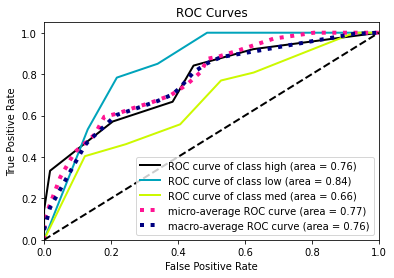

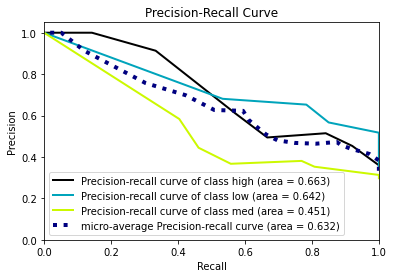

In [291]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica - Arbol de decision Entropy
y_score_entropy = algoEntropy.predict_proba(X_test)
y_pred = algoEntropy.predict(X_test)
plot_roc(y_test, y_score_entropy)
plt.show()
    
plot_precision_recall(y_test, y_score_entropy)
plt.show()


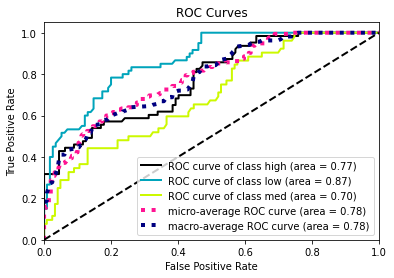

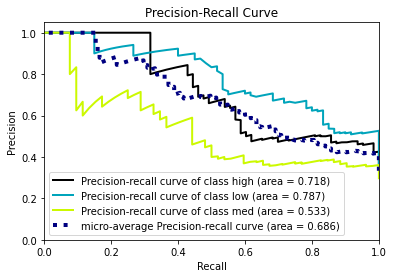

In [292]:
y_score_RF = RFMODEL.predict_proba(X_test)
y_pred = RFMODEL.predict(X_test)
plot_roc(y_test, y_score_RF)
plt.show()
    
plot_precision_recall(y_test, y_score_RF)
plt.show()

Construya un párrafo con los principales hallazgos. Teniendo en cuenta la gráfica de rendimiento ROC del modelo en ambos modelos sea cart con Gini o Random Forest la clasificación es mucho mejor en la clase low para safety, siendo el valor de 0.87 el mejor. Por otro lado, random forest clasifica mejor la clase med con 0.70 versus un 0.66 del arbol de decisión, finalmente la clase high son muy parejas en ambos modelos. En conclusión si se desea clasificar los autos con baja y media seguridad el modelo de random forest es el mejor, si se desea clasificar el auto con seguridad alta ambos modelos son eficientes, pese al 57% de accuracy.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: ventajas y desventajas de cada modelo propuesto, Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. Recomendaciones de mejora de las propuestas: 

Como conclusiones finales se encuentra que ambos modelos son muy sensibles a sus configuraciones con los parámetros de testeo y entrenamiento al iterar la mejor recomendación es la relacion 90% entrenamiento y 10% testeo.

De igual forma se utilizó el criterio de gini y entropy para verificar la eficiencia siendo idénticas. Al no afectar se revisó el overfitting y underfitting del modelo obteniendo en ambos casos una diferencia de 0.04 puntos. Lo cual indica un modelo no sesgado, lo cual fue clave la codificación usando las variables dummies que provee pandas.

En cuanto a las variables importantes se evidencia que Person_2, class_unacc, class_vgood, son los atributos importantes que determinan la clasificación, la profundidad máxima de los arboles fue de 3 para obtener la mejor eficiencia siendo importante la librería scikit learn con poda.

Importante el uso de la técnica de hiper parametrización gridsearchCV para identificar los mejores criterios en el algoritmo random forest, siendo entropy y la profundidad de 4 árboles la mejor. Finalizando con una mejora de la clase low y med para clasificar y High siendo la menos fácil de clasificar. Ambos modelos no son lo suficiente buenos pero se puede quitar atributos para mejorar la eficiencia o revisar correlaciones despues del encoding para quitar valores que no aportan.

Finalmente, se recomienda seguir mejorando el algoritmo de randomo forest mejorando la calidad de la data para acercarse mas a una eficiencia coherente y sinergía entre sensibilidad y especificidad para poder estar equilibrado en las tres clases y ejecutar el algoritmo balanceando el atributo class.

Fuentes usadas de apoyo:

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification

https://www.kaggle.com/code/pythonafroz/evaluation-metrics-used-in-machine-learning